In [12]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
from os import path

In [13]:
def crop(image):
    return image[60:-25, :, :] # remove the sky and the car front

def resize(image):
    return cv2.resize(image, (200, 66), cv2.INTER_AREA)

def rgb2yuv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)   

def random_shadow(image):
    """
    Generates and adds random shadow
    """
    # (x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = 200 * np.random.rand(), 0
    x2, y2 = 200 * np.random.rand(), 66
    xm, ym = np.mgrid[0:66, 0:200]

    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)


def random_brightness(image):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

True


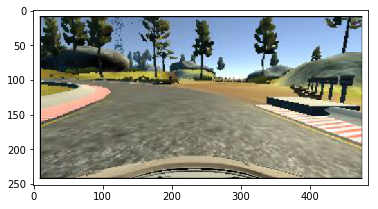

In [14]:
current_path = './images/center-Copy1.png'
print(path.exists(current_path))

image = mpimg.imread(current_path)
plt.imshow(image)

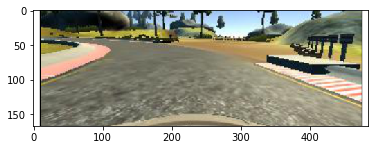

In [15]:
crop_image = crop(image)
plt.imshow(crop_image)
plt.savefig('./images/crop_center.png')

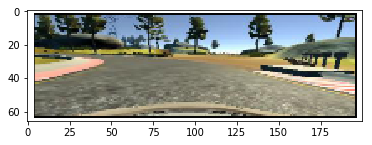

In [16]:
resize_image = resize(image)
plt.imshow(resize_image)
plt.savefig('./images/resize_center.png')

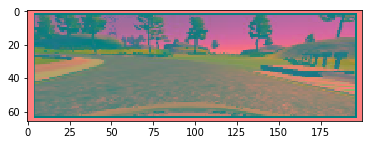

In [18]:
yuv_image = rgb2yuv(resize_image)
plt.imshow(yuv_image)
plt.savefig('./images/yuv_center.png')